#          **English Premier League Prediction**



## **Project Overview**



The English Premier League (EPL) stands as one of the most-watched soccer leagues globally, drawing an estimated 12 million viewers per match. With such immense popularity and substantial financial rewards at stake, top EPL teams are increasingly turning to analytics and artificial intelligence (AI) to gain a competitive edge. In the realm of sports analytics, machine learning and AI have gained significant traction, revolutionizing the way data is utilized. Advanced algorithms are now widely employed across the sports entertainment industry. These technologies not only help maximize profits but also mitigate business risks, such as those associated with player selection or betting decisions. By leveraging AI-driven insights, stakeholders are better equipped to make informed choices, ensuring both performance and profitability.


<br>

![image](../PL.webp)

<br>


Regression is one of the foundational techniques in machine learning, and among its various forms, linear regression stands out as one of the most well-understood and widely used algorithms. It plays a critical role in solving real-world problems by modeling relationships between variables and making predictions based on data. In this project, we aim to leverage linear regression to predict the performance scores of English Premier League (EPL) soccer players. The EPL, being one of the most popular and financially lucrative soccer leagues globally, provides a rich dataset for analysis. By applying linear regression, we can uncover patterns and relationships in player performance metrics, enabling us to make accurate predictions about their future scores. This approach has significant business implications. Accurate predictions of player performance can help teams make informed decisions regarding player selection, transfers, and investments, while also reducing risks associated with betting on underperforming players. The use of machine learning in sports analytics, particularly linear regression, has already proven to be a powerful tool in optimizing strategies and maximizing returns
. With the business context established, the project will now delve into the technical aspects of implementing linear regression for this purpose.



## **Project Takeaways**

* What is Regression?
* Types of Regression
* What are Mean, Variance, and Standard Deviation?
* Correlation and Causation
* Underfitting and Overfitting
* Mathematics behind Regression
* Assumptions of Linear Regression
* Simple Linear Regression
* Understanding Interpolation and Extrapolation
* Coefficient of Determination ($R^2$)
* F - Statistics
* Diagnostic and Remedial Measures

## **Approach**

* Install Packages
* Import Libraries
* Data Reading from Different Sources
* Exploratory Data Analysis
* Correlation
* Relationship between Cost and Score
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies

## **Used Libraries**
 
* **pandas**
 
* **NumPy**
 
* **Matplotlib**
 
* **seaborn**
 
* **scikit-learn**:
 
* **statsmodels**
* **SciPy**
 



## **Install Packages**

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install required packages
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install pandas
!pip install scipy
!pip install scikit_learn


In [4]:
#import required packages
import pandas as pd
import numpy as np
from scipy import stats
import scipy

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns



In [2]:
# Load the data as a data frame by using URL

soccer="../data/Raw/EPL_Soccer.csv"
df = pd.read_csv(soccer)

In [ ]:
df.head(5)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [16]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


## **Exploratory Data Analysis**


### **Dataframe Information**


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


## **Dataframe Descriptive Statistics**


In [7]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [8]:
df.describe(include='all')

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202,202,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
unique,198,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Rogers, Mr. William John",CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,NaN,NaN,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,NaN,NaN,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,NaN,NaN,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,NaN,NaN,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,NaN,NaN,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000


In [9]:
df.corr(numeric_only=True)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


### **Think about it - I**
 
Can Pearson or Spearman correlation coefficient be used to find correlation between categorical variables?

## **Correlation does not imply Causation!!**
 
Some studies show that people in the UK spend more money on shopping when it's cold which shows correlation between two variables. Does this imply cold weather causes people to spend more money? The answer is NO. One of the possible explanations is that cold weather coincides with Christmas and new year sales, hence people shop more.
 
Correlation between two variables indicates association between two variables but it does not mean change in one variable is caused by another.
 
Watch the explanation of [Correlation does not imply Causation](https://www.projectpro.io/project/hackerday-project/project-title/fundamentals-simple-linear-regression-python-beginners#sub-hackerday-video-5).



Text(0.5, 1.0, 'Scatter plot between Cost and Score')

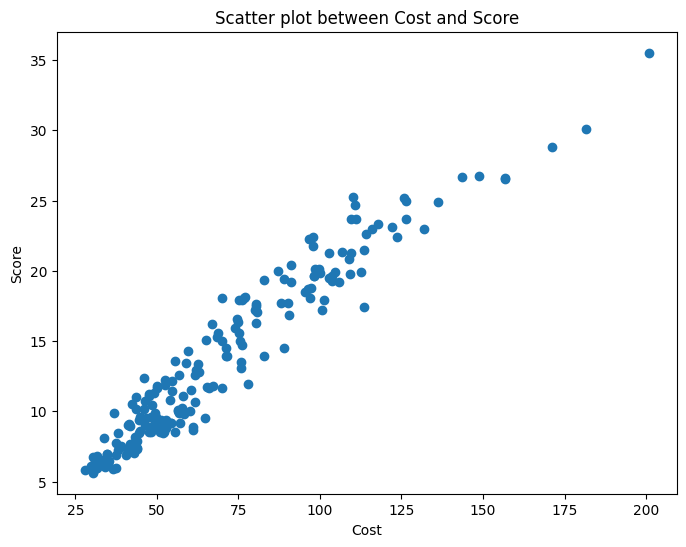

In [10]:

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(df['Cost'], df['Score'])


plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")



### **Think about it - II**

Assume you have a dataset with both categorical and numerical variables. When you create a linear regression model on it, you notice that it performs poorly on training data and even worse on testing data.
 
You conclude that the model is underfitting and that a complex model is needed, so you use polynomial regression with a high degree.
 Your model now performs extremely well on training data but significantly poorly on testing data. It has now overfitted.
 
What do you believe happened? Do you think you'd have to find a sweet spot between simple and complicated models? How can you do it?

In [12]:
x=df['Cost']
y=df['Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [22]:
lr = sm.OLS(y_train, x_train).fit()
print("Model without intercept Summary:--\n",lr.summary())
print()
#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print("Model with intercept Summary:--\n",lr.summary())


Model without intercept Summary:--
                                  OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                   3.84e-144
Time:                        23:43:30   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

### **Think about it - III**

What would happen if we do not include constant while building the Linear Regression model?

Intercept(B0)=0.95 Slope(B1)=0.18 


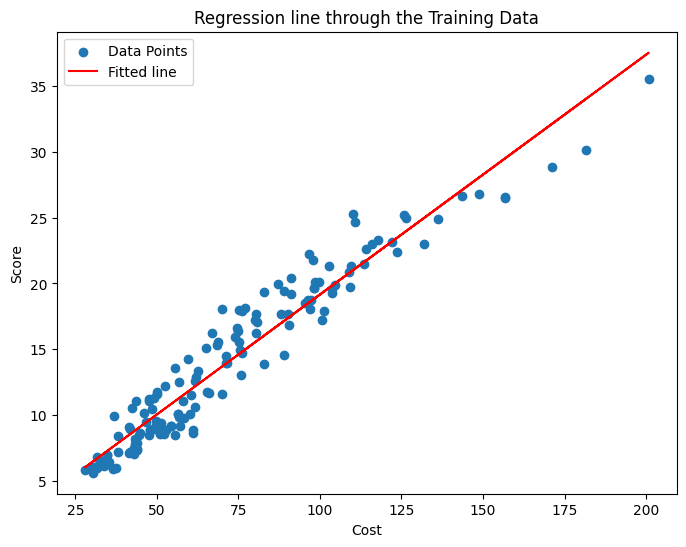

In [30]:
#Extract the B0, B1
b0=lr.params.iloc[0]
b1=lr.params.iloc[1]

print(f"Intercept(B0)={b0:0.2f} Slope(B1)={b1:0.2f} ")

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_train, y_train, label='Data Points')

plt.plot(x_train, b0+ b1*x_train, color='red', label='Fitted line')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.legend()
plt.show()

## **Prediction on Test Data**

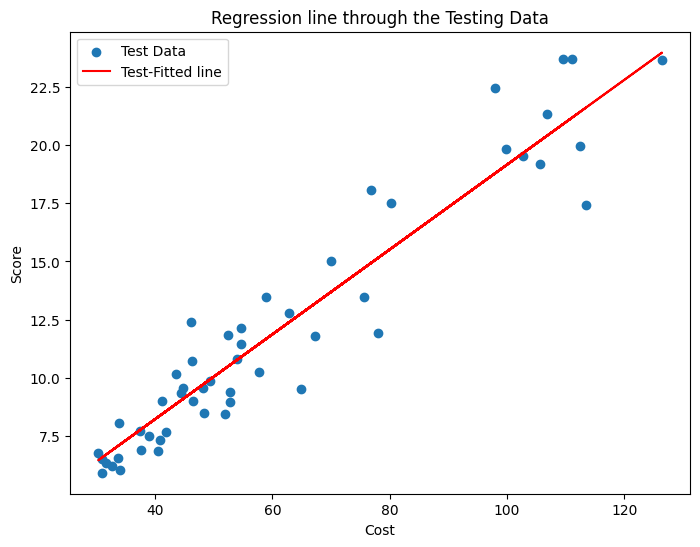

In [34]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=100)
plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_test, y_test_fitted, color='red', label='Test-Fitted line')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")
plt.legend()
plt.show()

Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.
 
Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.


## **Assumptions of Linear Regression**
 
 
Linear regression is a parametric model which means it requires the specification of some parameters before they can be used to make predictions. These parameters or assumptions are:
 
* **The relationship between the independent and dependent variable is linear**: the line of best fit through the data points is a straight line.
 
* **Homoscedasticity**: means homogeneity of variance of residuals across the values of the independent variable.
 
* **Independence of observations:** the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
 
* **Normality**: The data follows a normal distribution.


## **Diagnostics and Remedies**
 
As we learned in the previous section, Linear Regression follows some assumptions. The section Diagnostics and Remedies is evaluating if the data follows the assumptions or not, whether Linear Regression is a good fit for the patterns in the data, and simply includes the things we do in order to assess how well the model performs. The following are the things we look for in the data to diagnose Linear Regression as an unfit model:
 
* **Non-Linearity**: First thing to look for is non-linearity, for example, your data might look linear for some time, and then it shows non-linearity and a parabola would fit better than a straight line.
 
* **Heteroscedasticity**: meaning non-constant variance, variance in one region may not be the same as in the second region.
 
* **Independence**: Errors are not independent and identically distributed.
 
* **Outliers**: Outliers can have a large impact on the model, for example, if there's a slow-growing regression line and there is an outlier up in the center, it will pull the regression line upwards than most of the data.
 
* **Missing Features**: Missing predictor variables, no need in a simple linear regression, which simply means losing on variables that can be useful but are not included.
 
 
How do we begin to assess all these things? 
 
**Residual Analysis**
 
Residual analysis is used to study residuals in data and to understand what needs to be done to improve our model performance. Residual is the error we get by subtracting the prediction value from the true value of the dependent variable. 
 
 
$$R_i = y_i-\hat y_i$$
 
* First, plot the residual versus predictor; if the scatter plot shows a departure from linearity (parabola), reevaluate the model; if not, try a modification to make the data linear.
 
* This plot also shows indications of non-constant variance; if the data points scatter in the shape of a megaphone, we can claim the variance is not constant. We can also use transformations to overcome heteroscedasticity, or we can use weighted least squares.
 
* Another plot that can be used is a sequence plot or residuals versus time order. We may want to search for a cyclical pattern or a straight trend, which indicates when linear regression would be useful and when it would not.
 
* Box plot of residuals: if we have a lovely and centered box plot, we are fine; if we have a little bias to one side of the box plot, we clearly lack some normalcy; we can also check this with normal probability plot if it is skewed to the right and skewed to the left.
 
* Next is to check for outliers, don't eliminate outliers unless you absolutely have to such as in a scenario when a data point is simply incorrect. 
 
 
Here's a link to the full explanation on [Diagnostics and Remedies](https://www.projectpro.io/project/hackerday-project/project-title/fundamentals%20simple%20linear%20regression%20python%20beginners#sub-hackerday-video-19).


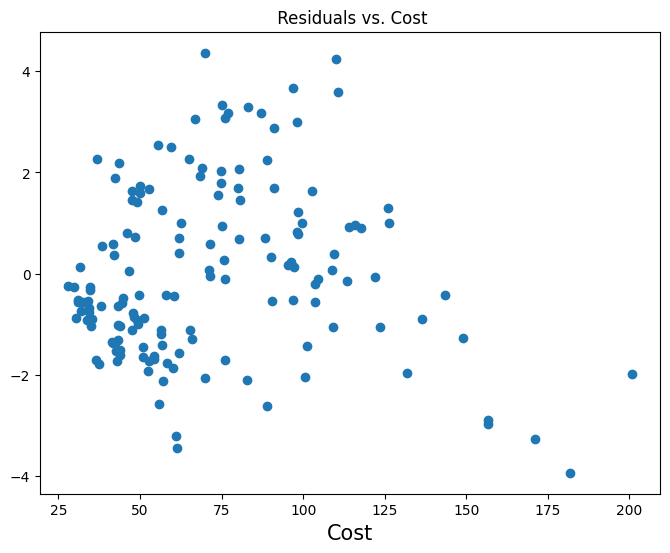

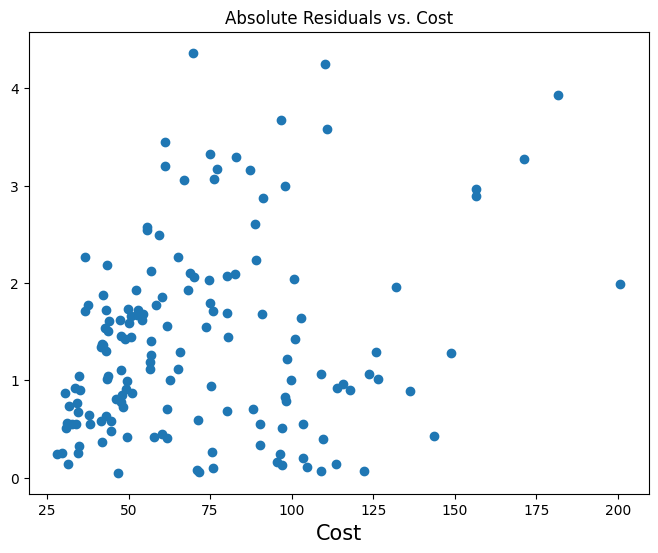

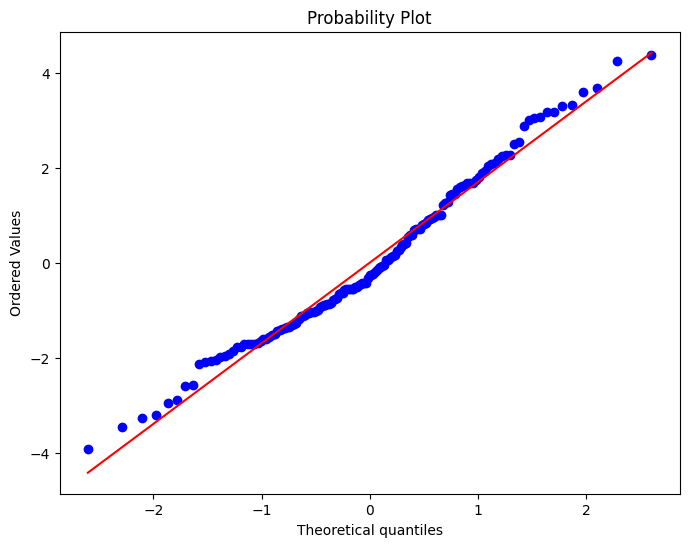

<Figure size 640x480 with 0 Axes>

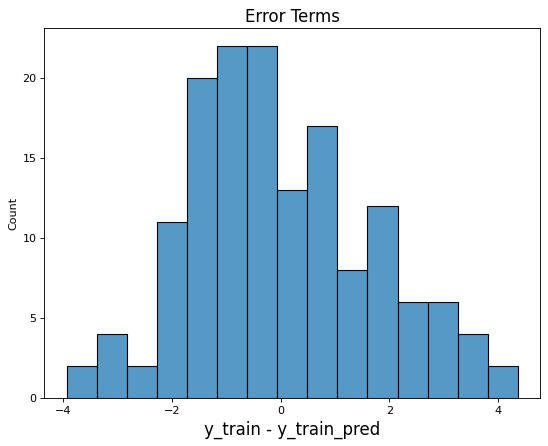

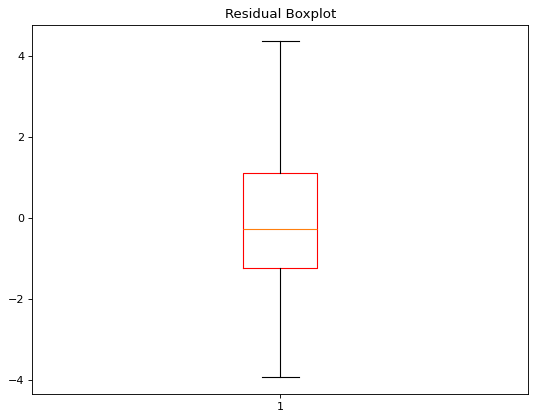

In [36]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=100)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=100)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=100)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.histplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

At the beginning of the section - Diagnostics and Remedies, we saw the steps we can take to understand the patterns in data and if we need to do some transformations to make the assumptions of linear regression hold true. Here are the observations that we made from the above plots:
 
* The residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it. 
 
* The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.
 
* The residual boxplot shows no obvious outliers.
 
 
Here's a link to the full explanation of how to deduce observations from such plots, [Diagnostics and Remedial measures in practice](https://www.projectpro.io/project/hackerday-project/project-title/fundamentals%20simple%20linear%20regression%20python%20beginners#sub-hackerday-video-20).

### **Transformations to avoid non-constant variance**

Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance, there are different data transformations that can be applied.

* Log transformation: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into logarithmic values.

* Square root transformation: This transformation is also used to stabilize the variance by converting the data into square root values.

* Box-Cox transformation: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. The Box-Cox transformation is a more flexible and powerful transformation compared to the log and square root transformations.

* Yeo-Johnson transformation: This is a newer and more flexible version of the Box-Cox transformation that can handle both positive and negative data values.

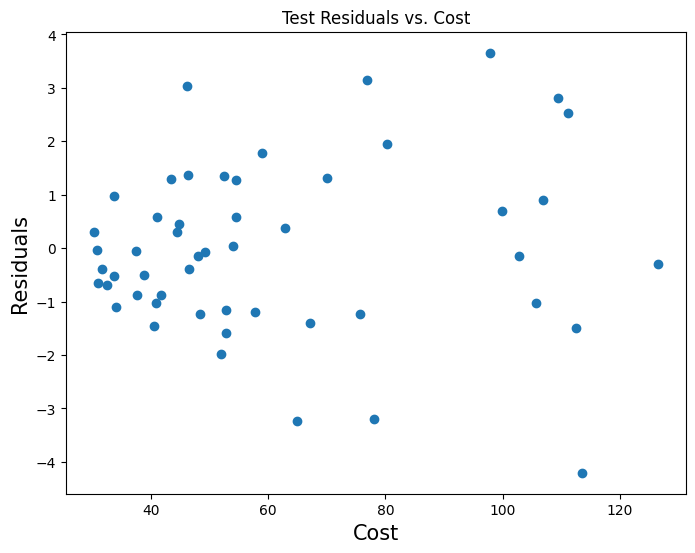

In [38]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)


#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=100)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

We can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity.
 
We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

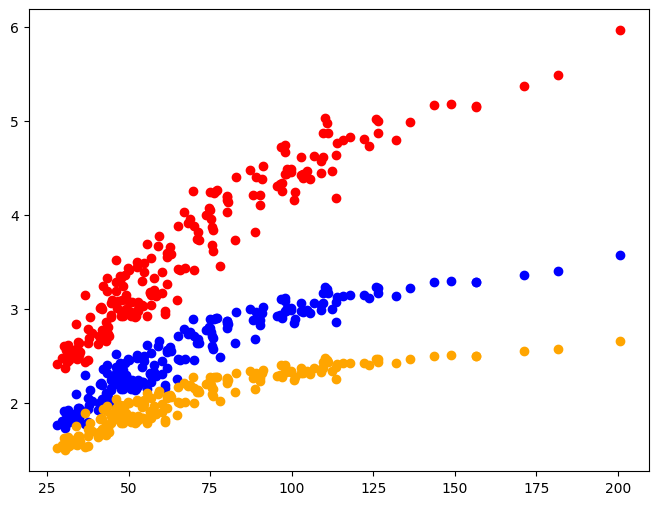

In [40]:
# 

#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=100)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [42]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           9.72e-75
Time:                        00:09:38   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

We can see the change in $R^2$ and Adjusted $R^2$ after the transformation. They are almost similar which suggests that $R^2$ is no longer overestimating the variance explained by the predictor variable.

Intercept(B0)=1.97 Slope(B1)=0.02 


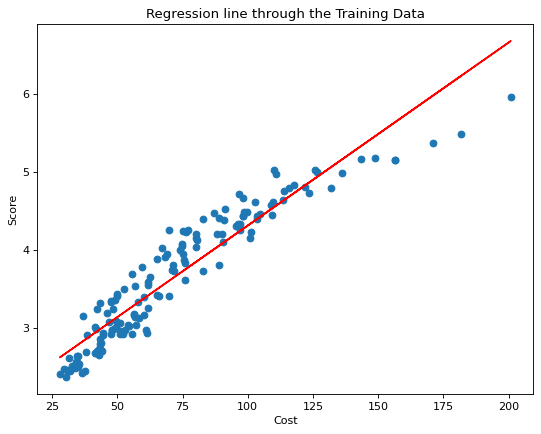

In [43]:
#Extract the B0, B1
b0=lr.params.iloc[0]
b1=lr.params.iloc[1]

print(f"Intercept(B0)={b0:0.2f} Slope(B1)={b1:0.2f} ")

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

We extracted the linear regression coefficients and plotted the regression line on the Cost vs Score scatter plot.

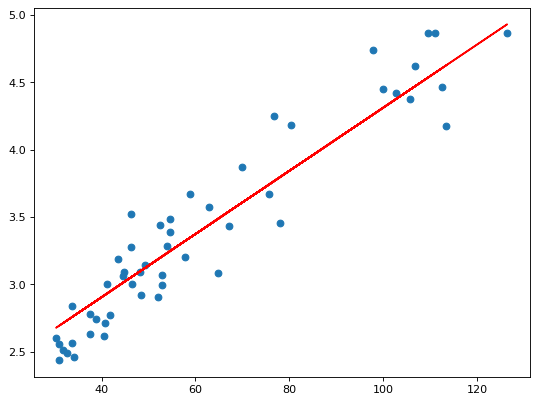

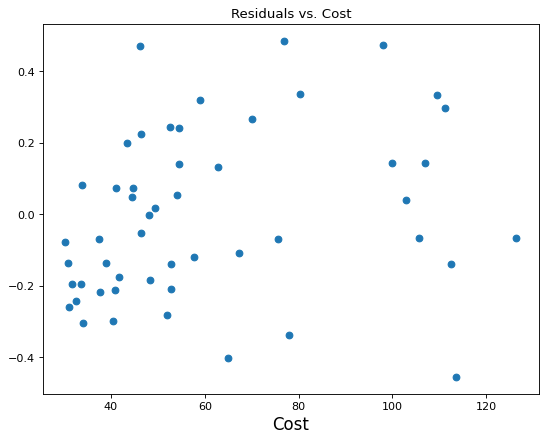

In [44]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination

Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.

### **Try it out - I**
 
* Take any other independent variable than Cost and fit a simple linear regression model using it.
 
* Can you compare these models? Which of these two fitted models is best?

## **Interview Questions**
 
* What do you understand by correlation?

* Does correlation imply causation? Can you explain it with some examples?

* Can you explain what is Linear Regression?

* What are the assumptions of Linear Regression?

* What is $R^2$ and Adjusted $R^2$?

* What are RMSE and MSE?

* What is the effect of heteroscedasticity on Regression Models? Is there any solution to it?
